In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("Output3.csv")
data.drop(data.index[:1], inplace=True)
data.head(10)

,Unnamed: 0,speed,kmh,yaw,rad,pirad,Fuzzy Value
1,1,5.29E+00,19.04399986,-257.4278509,-4.494772001,-1.430154727,0.209397
2,2,5.70E+00,20.51999931,-285.5454296,-4.985713849,-1.586363498,0.176190
3,3,5.78E+00,20.80800076,-273.8312192,-4.781180018,-1.521284551,0.176190
4,4,6.47E+00,23.29199924,-168.1690526,-2.936285045,-0.934272514,0.221406
5,5,6.13E+00,22.06800041,-211.1882734,-3.687414298,-1.173268186,0.176190
6,6,6.11E+00,21.99600048,-297.3197999,-5.191298093,-1.651776666,0.176190
7,7,6.03E+00,21.70800076,-283.8928189,-4.956858743,-1.577182327,0.176190
8,8,6.10E+00,21.95999966,-190.327674,-3.32318161,-1.057375967,0.176190
9,9,6.04E+00,21.74399986,-174.4835976,-3.046539005,-0.96935332,0.197694
10,10,6.28E+00,22.60800076,-188.1199492,-3.284634033,-1.045110829,0.176190


In [15]:
data["Driver"] = ""
data.head(10)

,Unnamed: 0,speed,kmh,yaw,rad,pirad,Fuzzy Value,Driver
1,1,5.29E+00,19.04399986,-257.4278509,-4.494772001,-1.430154727,0.209397,
2,2,5.70E+00,20.51999931,-285.5454296,-4.985713849,-1.586363498,0.176190,
3,3,5.78E+00,20.80800076,-273.8312192,-4.781180018,-1.521284551,0.176190,
4,4,6.47E+00,23.29199924,-168.1690526,-2.936285045,-0.934272514,0.221406,
5,5,6.13E+00,22.06800041,-211.1882734,-3.687414298,-1.173268186,0.176190,
6,6,6.11E+00,21.99600048,-297.3197999,-5.191298093,-1.651776666,0.176190,
7,7,6.03E+00,21.70800076,-283.8928189,-4.956858743,-1.577182327,0.176190,
8,8,6.10E+00,21.95999966,-190.327674,-3.32318161,-1.057375967,0.176190,
9,9,6.04E+00,21.74399986,-174.4835976,-3.046539005,-0.96935332,0.197694,
10,10,6.28E+00,22.60800076,-188.1199492,-3.284634033,-1.045110829,0.176190,


In [16]:
def manuver(Fuzzy):
  if Fuzzy <0.35:
    return 'Agresif'
  elif Fuzzy >0.65 and Fuzzy <1:
    return 'overtake'
  elif Fuzzy >0.35 and Fuzzy <0.65:
    return 'Normal'
  else:
    return 'tidak terdeteksi'

In [17]:
for i in range (1, len(data)):
  data['Driver'][i] = manuver(data['Fuzzy Value'][i])
data.head()

data.to_csv('Kategori Driver 3.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


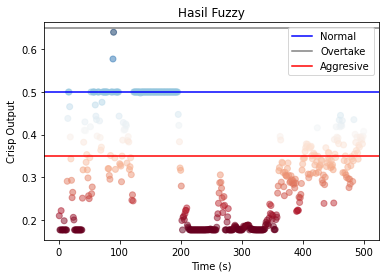

In [18]:
fig, ax1 = plt.subplots()

#labels
ax1.set_ylabel('Crisp Output')
ax1.set_xlabel('Time (s)')
ax1.set_title('Hasil Fuzzy')

#c sequence
c = data['Fuzzy Value']

#plot
plt.scatter(data['Unnamed: 0'], data['Fuzzy Value'] , c=c, 
            cmap = 'RdBu', alpha =0.5)
plt.axhline(y=0.5, color='blue', linestyle='-', label='Normal')
plt.axhline(y=0.65, color='grey', linestyle='-', label='Overtake')
plt.axhline(y=0.35, color='red', linestyle='-', label='Aggresive')
plt.legend()